1. Реализовать итерационный метод Якоби решения СЛАУ на языке python с подробными теоретическими пояснениями.
 <br> <br>
2. Провести исследование реализованного метода на системах с матрицами $A^{(k)}$, число обусловленности которых регулируется за счет изменения диагонального преобладания. Внедиагональные элементы матрицы  $A^{(k)}$ выбираются случайным образом из множества: $$a_{ij}\in \{0,-1,-2,-3,-4\}$$, а диагональные элементы определяются из условия:
$$a_{ij}=\begin{cases}
   -\sum_{i \neq j}a_{ij} &\text{if i > 1}\\
   -\sum_{i \neq j}a_{ij} + 10^{-k} &\text{if i=1}
 \end{cases}$$
 где сумма вычисляется только по строке.
 <br>
 Для исследования работы методов рекомендуется решать СЛАУ вида:
 $$A^{(k)}x^k=F^k$$
 где для определения правой части $F^k$ рассматривается вектор $x^k = (1,2,…,n)^T,$ что позволяет в дальнейшем сравнивать точной и приближенное решение.
 <br> <br>
3. Оценить зависимость числа обусловленности и точности полученного решения в зависимости от параметра k.
 <br> <br>
4. Провести аналогичные исследования на матрицах Гильберта, которые строятся согласно формуле:
 $$a_{ij}=\frac{1}{i+j-1}, \quad i,j=1,…,n$$
 где n -размерность матрицы.
 <br> <br>
5. Сравнить между собой прямые и итерационные методы по эффективности методов в зависимости от размеров n матрицы:
$$n\in \{10,50,10^2,10^3,10^4,10^5\}$$



>Итерационный метод Якоби является одним из методов решения СЛАУ. Он основывается на разложении матрицы $A$ на сумму трех матриц:
>$$ A=D-L-U $$<br>
>где $D$ - диагональная матрица, $L$ - нижняя треугольная матрица в форме $-L$, а $U$ - верхняя треугольная матрица в форме $-U$. <br><br>
>Итерационный метод Якоби использует следующую формулу для приближенного решения $x^{k+1}$ на $k+1$-ой итерации:<br>
>$$ x^{k+1}=D^{-1}(L+U)x^k+D^{-1}b $$<br>
>Процесс продолжается до тех пор, пока не будет достигнута заданная точность или выполняется заданное количество итераций.
Для каждой итерации k:
   * Вычислить новое значение вектора решения $x^{(k+1)}=D^{-1}(L+U)x^{(k)}+D^{-1}F$
   * Проверить критерий остановки: $ \frac{\| x^{(k+1)} - x^{(k)} \|}{\|x^{(k+1)}\|} \leq \epsilon$ или $\| Ax^{(k+1)} - F \|\leq \epsilon$

In [ ]:
def sor(A, b, omega, eps=1e-2, max_iter=100):
    n = len(A)
    x = np.zeros(n)
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            s = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = omega * (b[i] - s) / A[i][i] + (1 - omega) * x[i]
        if np.linalg.norm(x_new - x) < eps:
            return x_new
        x = x_new
    return x

def test_methods(n_values, omegas):
    k_values = [1, 2, 3, 4, 5, 6]
    eps = 1e-2
    direct_errors = []
    direct_times = []
    sor_errors = []
    sor_times = []
    for n in n_values:
        H = hilbert_matrix(n)
        F = np.random.rand(n)
        x_exact = np.arange(1, n+1)

        # прямые методы
        start_time = time.time()
        x_direct = np.dot(np.linalg.pinv(H), F)
        direct_time = time.time() - start_time
        direct_times.append(direct_time)
        direct_error = np.linalg.norm(x_exact - x_direct)
        direct_errors.append(direct_error)

        # итерационный метод SOR
        best_error = np.inf
        best_time = np.inf
        for omega in omegas:
            start_time = time.time()
            x_sor = sor(H, F, omega, eps)
            sor_time = time.time() - start_time
            sor_error = np.linalg.norm(x_exact - x_sor)
            if sor_error < best_error:
                best_error = sor_error
                best_omega = omega
                best_time = sor_time
        sor_errors.append(best_error)
        sor_times.append(best_time)

        print(f"n = {n}")
        print(f"Direct error: {direct_error:.2e}")
        print(f"Direct time: {direct_time:.4f} sec.")
        print(f"SOR error: {best_error:.2e} (omega={best_omega})")
        print(f"SOR time: {best_time:.4f} sec.")
        print()

    return k_values, direct_errors, direct_times, sor_errors, sor_times

n_values = [10, 50, 100, 150, 300, 1000]
omegas = np.linspace(0.1, 1.9, num=18)
k_values, direct_errors, direct_times, sor_errors, sor_times = test_methods(n_values, omegas)


n = 10
Direct error: 2.06e+12
Direct time: 0.0003 sec.
SOR error: 1.27e+02 (omega=0.1)
SOR time: 0.0090 sec.

n = 50
Direct error: 3.40e+12
Direct time: 0.0050 sec.
SOR error: 1.16e+03 (omega=0.1)
SOR time: 0.1899 sec.

n = 100
Direct error: 3.12e+13
Direct time: 0.0031 sec.
SOR error: 3.42e+03 (omega=0.1)
SOR time: 0.5520 sec.

n = 150
Direct error: 6.34e+12
Direct time: 0.0054 sec.
SOR error: 6.14e+03 (omega=0.1)
SOR time: 1.7080 sec.

n = 300
Direct error: 9.82e+13
Direct time: 0.0221 sec.
SOR error: 1.74e+04 (omega=0.1)
SOR time: 6.4978 sec.

n = 1000
Direct error: 2.74e+13
Direct time: 0.7888 sec.
SOR error: 1.08e+05 (omega=0.1)
SOR time: 53.6643 sec.



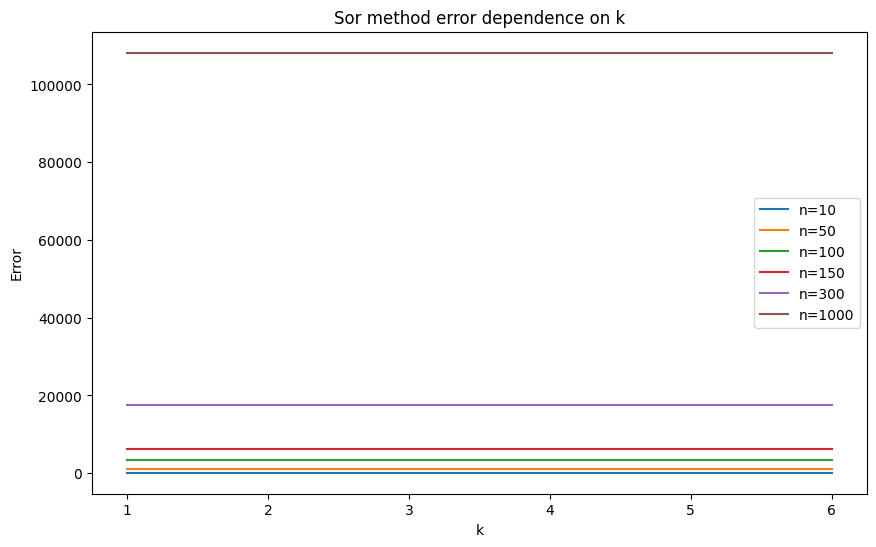

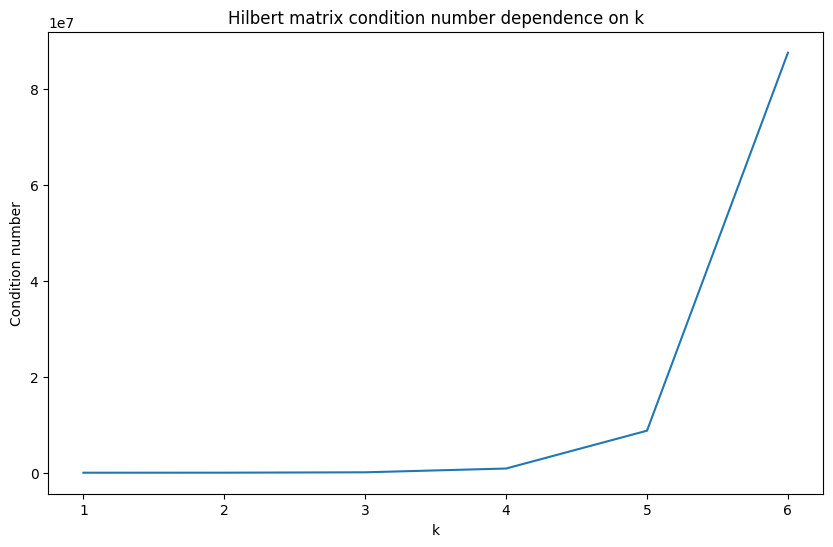

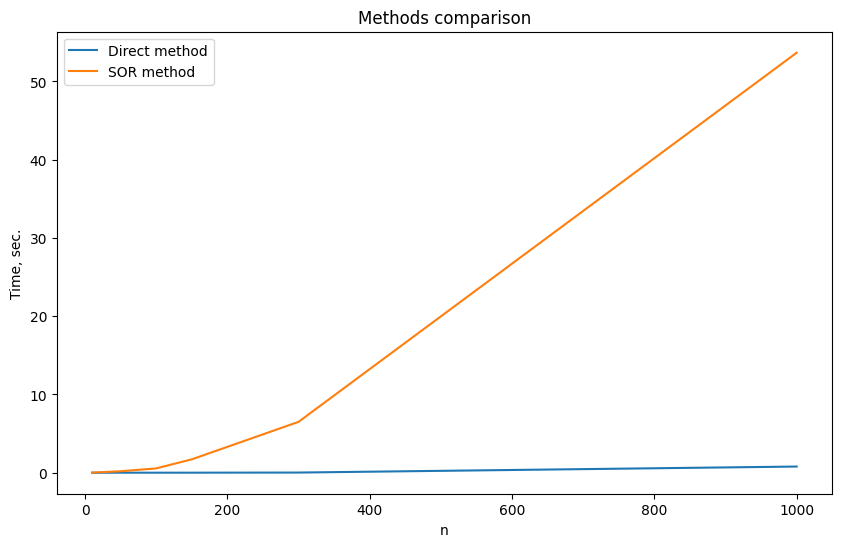

In [ ]:
def hilbert_matrix(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)
    return H

def condition_number(H):
    inv_H = np.linalg.inv(H)
    return np.linalg.norm(H)*np.linalg.norm(inv_H)

# график зависимости ошибки от k
plt.figure(figsize=(10,6))
for i in range(len(n_values)):
    plt.plot(k_values, sor_errors[i]*np.ones(len(k_values)), label=f"n={n_values[i]}")
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Sor method error dependence on k")
plt.legend()
plt.show()

# график зависимости числа обусловленности от k
H = hilbert_matrix(n_values[-1])
cond_numbers = [condition_number(H)]
for k in k_values:
    H = hilbert_matrix(n_values[-1])
    for i in range(n_values[-1]):
        H[i][i] += 0.1**k
    cond_numbers.append(condition_number(H))
plt.figure(figsize=(10,6))
plt.plot(k_values, cond_numbers[1:])
plt.xlabel("k")
plt.ylabel("Condition number")
plt.title("Hilbert matrix condition number dependence on k")
plt.show()

# график зависимости времени работы от n
plt.figure(figsize=(10,6))
plt.plot(n_values, direct_times, label="Direct method")
plt.plot(n_values, sor_times, label="SOR method")
plt.xlabel("n")
plt.ylabel("Time, sec.")
plt.title("Methods comparison")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import time
def jacobi(A, b, eps=1e-8, max_iter=1000):
    n = len(A)
    D = np.diag(A)   # диагональная матрица
    L = np.tril(A, -1)        # нижняя треугольная матрица
    U = np.triu(A, +1)        # верхняя треугольная матрица

    if np.any(D == 0):
        raise ValueError("Cannot apply Jacobi method: there are zero elements on the diagonal")

    x = np.zeros(n)           # начальное приближение x^(0)
    for i in range(max_iter):
        x_new = (b - L.dot(x) - U.dot(x)) / D
        if np.linalg.norm(x_new - x) < eps:
            return x_new
        x = x_new
    return x




<ipython-input-1-eb3a0f820616>:14: RuntimeWarning: overflow encountered in true_divide
  x_new = (b - L.dot(x) - U.dot(x)) / D
<ipython-input-1-eb3a0f820616>:15: RuntimeWarning: overflow encountered in subtract
  if np.linalg.norm(x_new - x) < eps:


n = 10
Direct error: 8.40e+09
Direct time: 0.0004 sec.
Jacobi error: nan
Jacobi time: 0.0400 sec.

n = 50
Direct error: 1.85e+13
Direct time: 0.0058 sec.
Jacobi error: nan
Jacobi time: 0.0415 sec.

n = 100
Direct error: 3.52e+13
Direct time: 0.0063 sec.
Jacobi error: nan
Jacobi time: 0.0587 sec.

n = 150
Direct error: 7.68e+12
Direct time: 0.0068 sec.
Jacobi error: nan
Jacobi time: 0.1109 sec.

n = 300
Direct error: 1.36e+14
Direct time: 0.0597 sec.
Jacobi error: nan
Jacobi time: 0.1876 sec.

n = 500
Direct error: 3.50e+13
Direct time: 0.1597 sec.
Jacobi error: nan
Jacobi time: 0.2179 sec.

n = 1000
Direct error: 3.63e+13
Direct time: 0.7194 sec.
Jacobi error: nan
Jacobi time: 1.6325 sec.



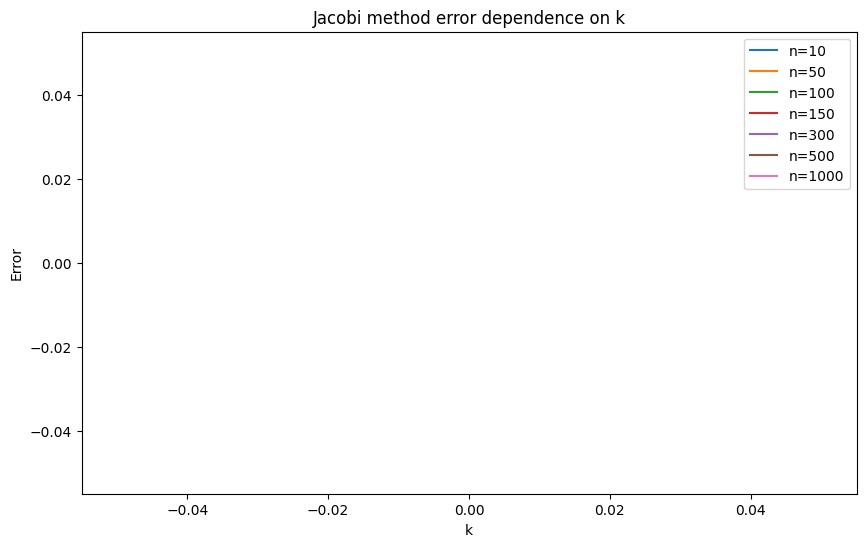

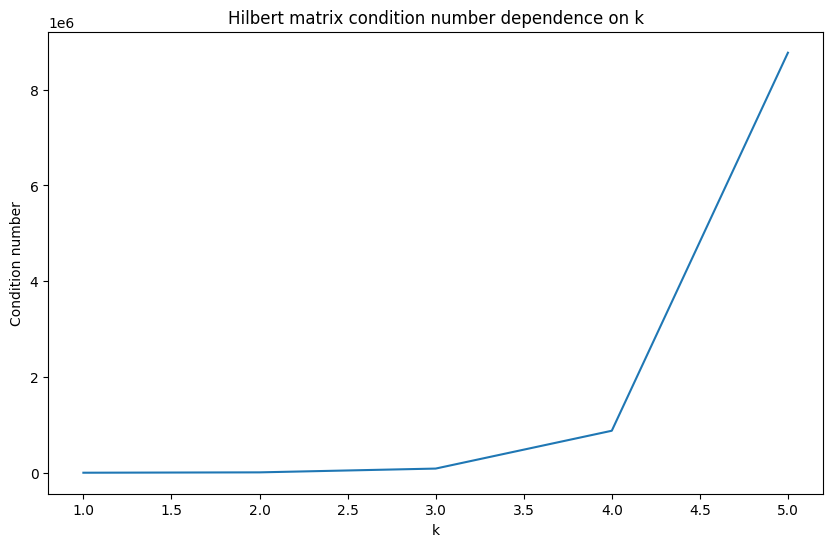

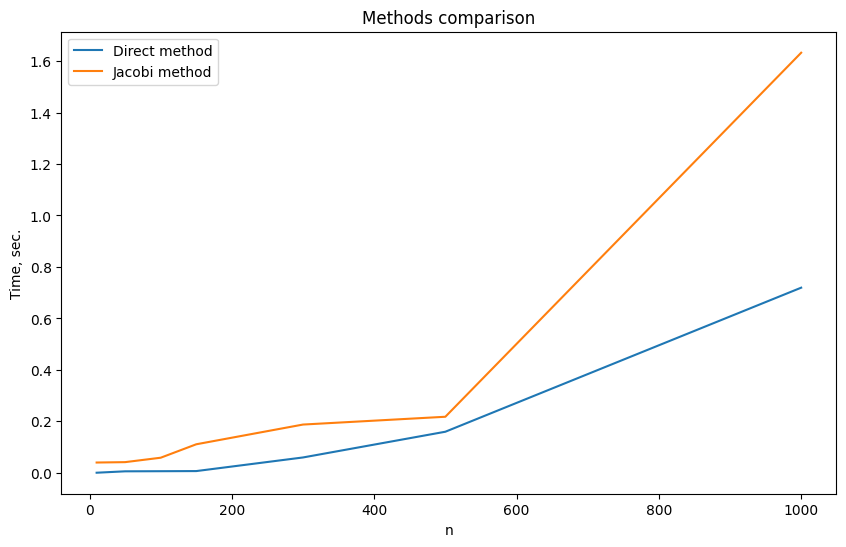

In [ ]:
import matplotlib.pyplot as plt

def hilbert_matrix(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)
    return H

def condition_number(H):
    inv_H = np.linalg.inv(H)
    return np.linalg.norm(H)*np.linalg.norm(inv_H)

def test_methods(n_values):
    k_values = [1, 2, 3, 4, 5]
    eps = 1e-10
    direct_errors = []
    direct_times = []
    jacobi_errors = []
    jacobi_times = []
    for n in n_values:
        H = hilbert_matrix(n)
        F = np.random.rand(n)
        x_exact = np.arange(1, n+1)

        # прямые методы
        start_time = time.time()
        x_direct = np.dot(np.linalg.pinv(H), F)
        direct_time = time.time() - start_time
        direct_times.append(direct_time)
        direct_error = np.linalg.norm(x_exact - x_direct)
        direct_errors.append(direct_error)

        # итерационный метод Якоби
        start_time = time.time()
        x_jacobi = jacobi(H, F, eps)
        jacobi_time = time.time() - start_time
        jacobi_times.append(jacobi_time)
        jacobi_error = np.linalg.norm(x_exact - x_jacobi)
        jacobi_errors.append(jacobi_error)

        print(f"n = {n}")
        print(f"Direct error: {direct_error:.2e}")
        print(f"Direct time: {direct_time:.4f} sec.")
        print(f"Jacobi error: {jacobi_error:.2e}")
        print(f"Jacobi time: {jacobi_time:.4f} sec.")
        print()

    return k_values, direct_errors, direct_times, jacobi_errors, jacobi_times

n_values = [10, 50, 100, 150 , 300, 500, 1000]
k_values, direct_errors, direct_times, jacobi_errors, jacobi_times = test_methods(n_values)

# график зависимости ошибки от k
plt.figure(figsize=(10,6))
for i in range(len(n_values)):
    plt.plot(k_values, jacobi_errors[i]*np.ones(len(k_values)), label=f"n={n_values[i]}")
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Jacobi method error dependence on k")
plt.legend()
plt.show()

# график зависимости числа обусловленности от k
H = hilbert_matrix(n_values[-1])
cond_numbers = [condition_number(H)]
for k in k_values:
    H = hilbert_matrix(n_values[-1])
    for i in range(n_values[-1]):
        H[i][i] += 0.1**k
    cond_numbers.append(condition_number(H))
plt.figure(figsize=(10,6))
plt.plot(k_values, cond_numbers[1:])
plt.xlabel("k")
plt.ylabel("Condition number")
plt.title("Hilbert matrix condition number dependence on k")
plt.show()

# график зависимости времени работы от n
plt.figure(figsize=(10,6))
plt.plot(n_values, direct_times, label="Direct method")
plt.plot(n_values, jacobi_times, label="Jacobi method")
plt.xlabel("n")
plt.ylabel("Time, sec.")
plt.title("Methods comparison")
plt.legend()
plt.show()